# Preparação dos dados

In [ ]:
import pandas as pd


file_path = "/content/dados_tratados.csv"


try:

    df = pd.read_csv(file_path)

    print(df.head())

    print(df.info())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
    print("This might be due to an incorrect delimiter or file formatting issues.")
    print("Try uncommenting the line 'df = pd.read_csv(file_path, delimiter=';')' and see if that helps.")

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year     

In [20]:
display(df.head())
print(df.info())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,mailed check,83.9,267.40,2.796667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [22]:
categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())
print(df_encoded.info())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7267 non-null   int64  
 1   tenure                                 7267 non-null   int64  
 2   Charges.Monthly                        7267 non-null   float64
 3   Charges.Total                          7267 non-null   float64
 4   Contas_Diarias                         7267 non-null   float64
 5   Churn_Yes                              7267 non-null   bool   
 6   gender_Male                            7267 non-null   bool   
 7   Partner_Yes                            7267 non-null   bool   
 8   Dependents_Yes                         7267 non-null   bool   
 9   PhoneService_Yes                       7267 non-null   bool   
 10  MultipleLines_Yes                      7267 non-null   bool   
 11  Inte

In [24]:
churn_counts = df['Churn'].value_counts()

churn_proportions = df['Churn'].value_counts(normalize=True)

print("Churn Counts:")
print(churn_counts)
print("\nChurn Proportions:")
print(churn_proportions)

imbalance_threshold = 0.7

if churn_proportions.min() < imbalance_threshold:
    print("\nPotential class imbalance detected.")
else:
    print("\nClass balance seems reasonable.")

Churn Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Proportions:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Potential class imbalance detected.


# Correlação e Seleção de Variáveis

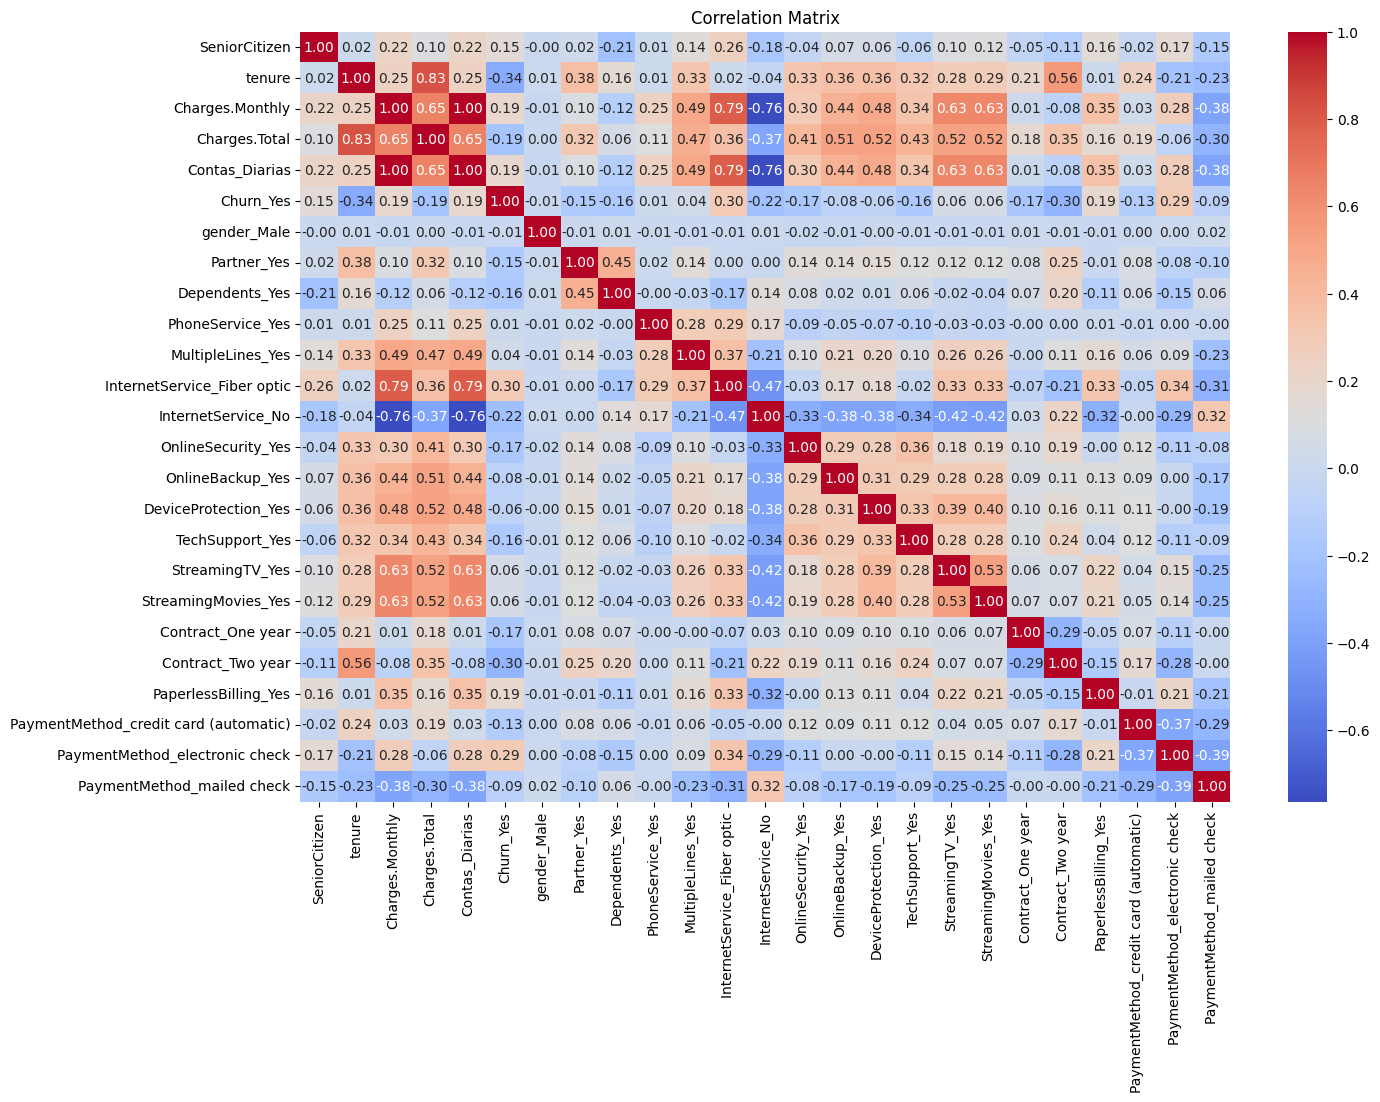


Correlation with Churn_Yes:
Churn_Yes                                1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_electronic check           0.294626
Charges.Monthly                          0.189866
Contas_Diarias                           0.189866
PaperlessBilling_Yes                     0.186666
SeniorCitizen                            0.146733
StreamingTV_Yes                          0.062430
StreamingMovies_Yes                      0.060586
MultipleLines_Yes                        0.039343
PhoneService_Yes                         0.012571
gender_Male                             -0.009555
DeviceProtection_Yes                    -0.063452
OnlineBackup_Yes                        -0.080163
PaymentMethod_mailed check              -0.090061
PaymentMethod_credit card (automatic)   -0.131085
Partner_Yes                             -0.148546
TechSupport_Yes                         -0.160440
Dependents_Yes                          -0.161384
OnlineSecurity_Yes   

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

if 'Churn_Yes' in correlation_matrix.columns:
    churn_correlation = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
    print("\nCorrelation with Churn_Yes:")
    print(churn_correlation)
else:
    print("\n'Churn_Yes' column not found in the correlation matrix.")

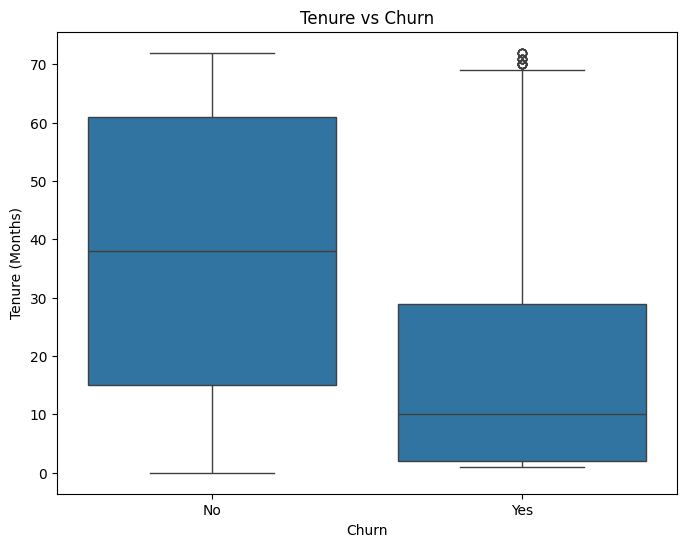

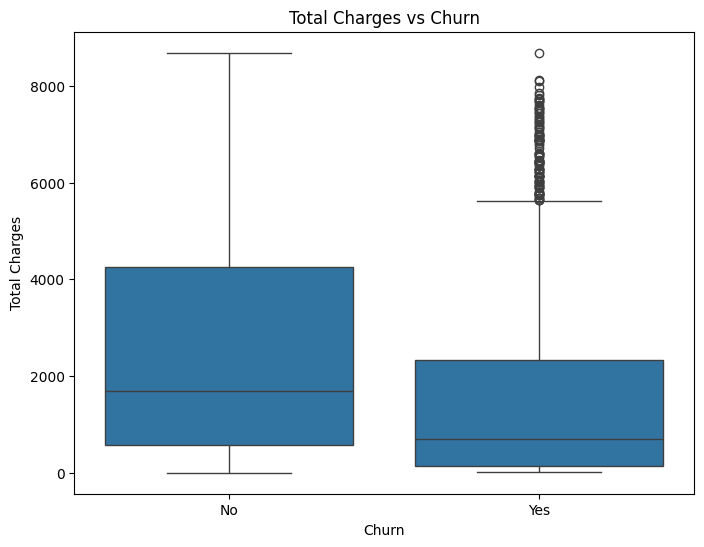

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Modelagem Preditiva

In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5086, 24)
Shape of X_test: (2181, 24)
Shape of y_train: (5086,)
Shape of y_test: (2181,)


### Modelagem Preditiva: Regressão Logística e Random Forest

Vamos criar dois modelos para prever a evasão de clientes: Regressão Logística e Random Forest.

**Regressão Logística:**

*   **Justificativa:** A Regressão Logística é um algoritmo de classificação linear que é eficiente e interpretabilidade razoável. É uma boa linha de base para problemas de classificação binária como a previsão de evasão.
*   **Necessidade de Normalização:** Modelos baseados em distância como a Regressão Logística são sensíveis à escala das features. A normalização dos dados ajuda a garantir que todas as features contribuam igualmente para o modelo, melhorando a convergência e o desempenho.

**Random Forest:**

*   **Justificativa:** Random Forest é um modelo de ensemble baseado em árvores de decisão. É robusto, lida bem com features não lineares e interações, e geralmente apresenta bom desempenho sem a necessidade de ajuste fino extenso.
*   **Necessidade de Normalização:** Modelos baseados em árvores, como Random Forest, não são sensíveis à escala das features, pois suas decisões são baseadas em limiares nas features individuais, não em distâncias. Portanto, a normalização não é estritamente necessária para este modelo.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Modelo de Regressão Logística (com Normalização) ---

# É recomendável normalizar os dados para Regressão Logística

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

numerical_cols_for_scaling = X_train_scaled.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled[numerical_cols_for_scaling] = scaler.fit_transform(X_train_scaled[numerical_cols_for_scaling])
X_test_scaled[numerical_cols_for_scaling] = scaler.transform(X_test_scaled[numerical_cols_for_scaling])

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("--- Avaliação do Modelo de Regressão Logística ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


# --- Modelo de Random Forest (sem Normalização) ---

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n--- Avaliação do Modelo de Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

--- Avaliação do Modelo de Regressão Logística ---
Accuracy: 0.8106373223292068

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1649
        True       0.63      0.54      0.58       532

    accuracy                           0.81      2181
   macro avg       0.74      0.72      0.73      2181
weighted avg       0.80      0.81      0.81      2181


Confusion Matrix:
 [[1480  169]
 [ 244  288]]

--- Avaliação do Modelo de Random Forest ---
Accuracy: 0.7982576799633195

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1649
        True       0.61      0.49      0.54       532

    accuracy                           0.80      2181
   macro avg       0.73      0.70      0.71      2181
weighted avg       0.79      0.80      0.79      2181


Confusion Matrix:
 [[1478  171]
 [ 269  263]]


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Avaliação do Modelo de Regressão Logística ---
print("--- Avaliação do Modelo de Regressão Logística ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

print("-" * 50) # Separator for clarity

# --- Avaliação do Modelo de Random Forest ---
print("--- Avaliação do Modelo de Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

--- Avaliação do Modelo de Regressão Logística ---
Accuracy: 0.8106373223292068

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1649
        True       0.63      0.54      0.58       532

    accuracy                           0.81      2181
   macro avg       0.74      0.72      0.73      2181
weighted avg       0.80      0.81      0.81      2181


Confusion Matrix:
 [[1480  169]
 [ 244  288]]
--------------------------------------------------
--- Avaliação do Modelo de Random Forest ---
Accuracy: 0.7982576799633195

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1649
        True       0.61      0.49      0.54       532

    accuracy                           0.80      2181
   macro avg       0.73      0.70      0.71      2181
weighted avg       0.79      0.80      0.79      2181


Confusion Matrix:
 [[1478  171]
 [ 269  263

# Interpretação e Conclusões

In [33]:
# --- Análise dos Coeficientes da Regressão Logística ---

log_reg_coefficients = log_reg_model.coef_[0]

feature_names = X_train_scaled.columns
log_reg_coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg_coefficients})

log_reg_coeff_df['Abs_Coefficient'] = abs(log_reg_coeff_df['Coefficient'])
log_reg_coeff_df = log_reg_coeff_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print("--- Coeficientes do Modelo de Regressão Logística ---")
display(log_reg_coeff_df)

--- Coeficientes do Modelo de Regressão Logística ---


,Feature,Coefficient
1,tenure,-1.454690
19,Contract_Two year,-1.228470
3,Charges.Total,0.787104
8,PhoneService_Yes,-0.777228
18,Contract_One year,-0.699822
15,TechSupport_Yes,-0.569773
11,InternetService_No,-0.541043
12,OnlineSecurity_Yes,-0.470567
20,PaperlessBilling_Yes,0.354425
13,OnlineBackup_Yes,-0.318891


In [34]:
# --- Análise da Importância das Variáveis do Random Forest ---

rf_feature_importances = rf_model.feature_importances_

feature_names = X_train.columns
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})

rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Importância das Variáveis do Modelo Random Forest ---")
display(rf_feature_importance_df)


--- Importância das Variáveis do Modelo Random Forest ---


,Feature,Importance
3,Charges.Total,0.154079
1,tenure,0.153051
2,Charges.Monthly,0.131907
4,Contas_Diarias,0.127431
19,Contract_Two year,0.062516
10,InternetService_Fiber optic,0.041528
22,PaymentMethod_electronic check,0.029734
18,Contract_One year,0.028618
12,OnlineSecurity_Yes,0.023699
20,PaperlessBilling_Yes,0.023414


# Relatório Detalhado sobre Evasão de Clientes

Este relatório apresenta uma análise exploratória dos dados, a modelagem preditiva para identificar clientes propensos à evasão e as variáveis mais relevantes que influenciam esse comportamento. Com base nas descobertas, são propostas estratégias de retenção de clientes.

## 1. Preparação e Exploração dos Dados

Os dados de clientes foram carregados do arquivo "dados_tratados.csv". A coluna `customerID` foi removida por ser um identificador único sem valor preditivo. Variáveis categóricas foram transformadas em formato numérico utilizando one-hot encoding para compatibilidade com os modelos de machine learning.

Durante a análise exploratória, foi identificada uma **potencial desigualdade de classes** na variável alvo (`Churn`). A proporção de clientes que não evadiram (`No`) é significativamente maior (aproximadamente 73.5%) do que a de clientes que evadiram (`Yes`) (aproximadamente 26.5%). Esse desequilíbrio pode impactar o desempenho dos modelos preditivos, especialmente na identificação da classe minoritária (clientes que evadem).

A matriz de correlação e os boxplots de `tenure` e `Charges.Total` versus `Churn` forneceram insights iniciais sobre as relações entre as variáveis. Observou-se que clientes com menor `tenure` (tempo de contrato) e `Charges.Total` (total gasto) tendem a ter uma maior taxa de evasão.

## 2. Modelagem Preditiva

Foram construídos dois modelos para prever a evasão de clientes: Regressão Logística e Random Forest.

### 2.1 Regressão Logística

O modelo de Regressão Logística foi escolhido por sua eficiência e interpretabilidade. Para este modelo, os dados numéricos foram padronizados (StandardScaler) para melhorar a convergência e o desempenho, pois a Regressão Logística é sensível à escala das features.

**Avaliação do Modelo de Regressão Logística:**

*   **Acurácia:** Aproximadamente 81.1%. A acurácia geral parece razoável, mas é importante considerar as métricas para cada classe devido ao desequilíbrio.
*   **Precisão (Classe 'Yes Churn'):** 0.63. Quando o modelo prevê que um cliente evadirá, ele está correto em 63% das vezes.
*   **Recall (Classe 'Yes Churn'):** 0.54. O modelo identifica corretamente 54% dos clientes que realmente evadirão. Isso indica que o modelo tem dificuldade em capturar todos os casos de evasão.
*   **F1-score (Classe 'Yes Churn'):** 0.58. A média harmônica entre precisão e recall, refletindo um desempenho moderado na previsão da classe minoritária.
*   **Matriz de Confusão:**
    *   True Negatives (Não evadiu, previsto como Não evadiu): 1480
    *   False Positives (Não evadiu, previsto como Evadiu): 169 (Erros Tipo I)
    *   False Negatives (Evadiu, previsto como Não evadiu): 244 (Erros Tipo II)
    *   True Positives (Evadiu, previsto como Evadiu): 288

### 2.2 Random Forest

O modelo Random Forest foi selecionado por sua robustez, capacidade de lidar com relações não lineares e bom desempenho geral sem a necessidade de normalização dos dados.

**Avaliação do Modelo de Random Forest:**

*   **Acurácia:** Aproximadamente 79.8%. Ligeiramente inferior à Regressão Logística neste conjunto de dados.
*   **Precisão (Classe 'Yes Churn'):** 0.61. Similar à Regressão Logística.
*   **Recall (Classe 'Yes Churn'):** 0.49. Inferior à Regressão Logística, indicando uma maior dificuldade em identificar clientes que evadirão.
*   **F1-score (Classe 'Yes Churn'):** 0.54. Ligeiramente inferior à Regressão Logística.
*   **Matriz de Confusão:**
    *   True Negatives: 1478
    *   False Positives: 171
    *   False Negatives: 269
    *   True Positives: 263

**Comparação dos Modelos:**

Ambos os modelos apresentaram desempenho similar, com uma ligeira vantagem para a Regressão Logística em termos de acurácia e recall para a classe de evasão. No entanto, ambos os modelos demonstram dificuldade em prever corretamente os clientes que evadem (baixo recall para a classe 'Yes Churn'). Isso é um reflexo direto do desequilíbrio de classes no conjunto de dados. Não há indícios claros de overfitting ou underfitting com base nestas métricas.

## 3. Análise das Variáveis Mais Relevantes

A análise das variáveis mais relevantes nos ajuda a entender quais fatores têm maior impacto na decisão de um cliente evadir.

### 3.1 Coeficientes da Regressão Logística

Os coeficientes da Regressão Logística (em ordem de magnitude absoluta) indicam a influência de cada variável na probabilidade de evasão:

*   **Tenure:** O coeficiente negativo mais alto (-1.45) sugere que quanto maior o tempo de contrato (tenure), menor a probabilidade de evasão. Clientes de longa data tendem a ser mais leais.
*   **Contract_Two year:** Um coeficiente negativo alto (-1.23) indica que clientes com contratos de dois anos têm uma probabilidade significativamente menor de evadir em comparação com o contrato de mês a mês (que é a categoria de referência).
*   **Charges.Total:** O coeficiente positivo (0.79) sugere que, mantendo outros fatores constantes, um maior valor total gasto está associado a uma maior probabilidade de evasão. Isso pode parecer contraintuitivo, mas pode estar relacionado a clientes que utilizam mais serviços (e pagam mais) e estão insatisfeitos.
*   **PhoneService_Yes:** O coeficiente negativo (-0.78) indica que ter serviço de telefone está associado a uma menor probabilidade de evasão.
*   **Contract_One year:** Similar ao contrato de dois anos, o coeficiente negativo (-0.70) mostra que clientes com contrato de um ano também têm menor probabilidade de evadir do que aqueles com contrato mensal.
*   **TechSupport_Yes, OnlineSecurity_Yes, InternetService_No, OnlineBackup_Yes, DeviceProtection_Yes:** Coeficientes negativos para estes serviços adicionais indicam que a assinatura desses serviços de valor agregado está associada a uma menor probabilidade de evasão. Clientes que utilizam mais serviços tendem a ser mais retidos.
*   **PaperlessBilling_Yes:** O coeficiente positivo (0.35) sugere que o faturamento sem papel está associado a uma maior probabilidade de evasão. Isso pode estar relacionado a um segmento específico de clientes ou a problemas na experiência com o faturamento digital.
*   **InternetService_Fiber optic:** O coeficiente positivo (0.31) indica que clientes com serviço de internet de fibra óptica têm uma maior probabilidade de evadir. Isso pode estar ligado a expectativas de desempenho não atendidas ou a uma maior concorrência neste segmento.
*   **PaymentMethod_electronic check:** O coeficiente positivo (0.24) sugere que clientes que utilizam cheque eletrônico como método de pagamento têm uma maior probabilidade de evadir.

### 3.2 Importância das Variáveis do Random Forest

A importância das variáveis no modelo Random Forest corrobora muitos dos achados da Regressão Logística, destacando a relevância de diferentes fatores:

*   **Charges.Total, Tenure, Charges.Monthly, Contas_Diarias:** Estas variáveis numéricas relacionadas ao uso e tempo de serviço aparecem como as mais importantes para o modelo Random Forest, reforçando a ideia de que o histórico de uso e gastos é um forte preditor de evasão.
*   **Contract_Two year, Contract_One year:** A importância dos tipos de contrato destaca novamente que contratos de maior duração estão associados a menor evasão.
*   **InternetService_Fiber optic, PaymentMethod_electronic check, PaperlessBilling_Yes:** A importância dessas variáveis no Random Forest confirma sua relevância, sugerindo que o tipo de serviço de internet, método de pagamento e faturamento sem papel são fatores a serem considerados.
*   **OnlineSecurity_Yes, TechSupport_Yes, InternetService_No, OnlineBackup_Yes, DeviceProtection_Yes:** A importância desses serviços adicionais no Random Forest também reforça a ideia de que a utilização de múltiplos serviços de valor agregado contribui para a retenção.

## 4. Principais Fatores de Evasão e Estratégias de Retenção

Com base na análise das variáveis e no desempenho dos modelos, os principais fatores que influenciam a evasão de clientes são:

*   **Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato são mais propensos a evadir.
*   **Tipo de Contrato:** Clientes com contrato de mês a mês evadem significativamente mais do que aqueles com contratos de um ou dois anos.
*   **Encargos Totais e Mensais:** Clientes com encargos totais e mensais mais altos também apresentam maior probabilidade de evasão, o que pode indicar insatisfação com o custo em relação ao valor percebido dos serviços.
*   **Serviços Adicionais:** A ausência de serviços como segurança online, backup online, proteção de dispositivo e suporte técnico está associada a uma maior taxa de evasão.
*   **Tipo de Serviço de Internet:** Clientes com internet de fibra óptica parecem ter uma maior propensão à evasão.
*   **Método de Pagamento e Faturamento:** O uso de cheque eletrônico e faturamento sem papel também se mostrou associado a uma maior probabilidade de evasão.

**Estratégias de Retenção Propostas:**

Com base nesses fatores, as seguintes estratégias de retenção podem ser consideradas:

*   **Programas de Fidelidade para Clientes de Curto Prazo:** Oferecer incentivos e benefícios para clientes nos primeiros meses de contrato para aumentar o engajamento e a probabilidade de renovação.
*   **Incentivos para Contratos de Longa Duração:** Promover ativamente a migração de clientes de contrato mensal para contratos de um ou dois anos, oferecendo descontos ou benefícios exclusivos.
*   **Análise de Custo-Benefício e Comunicação de Valor:** Para clientes com altos encargos, realizar análises personalizadas para garantir que eles percebam o valor dos serviços que estão utilizando. Comunicar os benefícios dos serviços adicionais e como eles justificam os custos.
*   **Promoção de Serviços de Valor Agregado:** Incentivar a adesão a serviços como segurança online, backup, proteção de dispositivo e suporte técnico, destacando como eles melhoram a experiência do cliente e aumentam a satisfação.
*   **Melhoria da Experiência com Fibra Óptica:** Investigar as causas da maior evasão entre clientes de fibra óptica. Pode ser necessário melhorar a qualidade do serviço, o suporte técnico ou gerenciar melhor as expectativas dos clientes.
*   **Otimização dos Métodos de Pagamento e Faturamento:** Analisar a experiência do cliente com o cheque eletrônico e o faturamento sem papel. Simplificar processos, oferecer suporte e garantir a segurança podem reduzir a evasão associada a esses fatores. Considerar oferecer incentivos para outros métodos de pagamento.
*   **Modelagem Preditiva Contínua:** Utilizar os modelos desenvolvidos para identificar proativamente clientes com alta probabilidade de evasão e direcionar esforços de retenção personalizados para esses grupos.

## 5. Conclusão

A análise dos dados e a modelagem preditiva revelaram que a evasão de clientes é influenciada por uma combinação de fatores relacionados ao tempo de contrato, tipo de contrato, uso e custo dos serviços, serviços adicionais e métodos de pagamento/faturamento. O desequilíbrio de classes na variável alvo representa um desafio na previsão precisa da evasão. As estratégias de retenção propostas visam abordar os principais fatores identificados, focando em aumentar o tempo de contrato, promover serviços de valor agregado e otimizar a experiência do cliente em pontos críticos. A implementação e o monitoramento contínuo dessas estratégias, juntamente com a refinamento dos modelos preditivos, são essenciais para reduzir a evasão de clientes e aumentar a retenção a longo prazo.